# Importação das Bibliotecas:


In [1]:
import pandas as pd
import seaborn as sn
import sklearn as sk
import numpy as np
import glob


# Carregamento dos Datasets de Resultados:

In [2]:
# Lista de nomes de arquivos CSV
csv_files = [
    "BF_alexNet_batchSize.csv",
    "BF_alexNet_bestConfig.csv",
    "BF_alexNet_epochs.csv",
    "BF_alexNet_learnRate.csv",
    "BF_vgg16_batchSize.csv",
    "BF_vgg16_bestConfig.csv",
    "BF_vgg16_epochs.csv",
    "BF_vgg16_learnRate.csv",
    "cifar10_alexNet_batchSize.csv",
    "cifar10_alexNet_bestConfig.csv",
    "cifar10_alexNet_epochs.csv",
    "cifar10_alexNet_learnRate.csv",
    "cifar10_vgg16_batchSize.csv",
    "cifar10_vgg16_bestConfig.csv",
    "cifar10_vgg16_epochs.csv",
    "cifar10_vgg16_learnRate.csv",
    "cifar10_vgg16_confusion_matrix.csv",
    "cifar10_alexNet_confusion_matrix.csv",
    "bf_vgg16_confusion_matrix.csv",
    "bf_alexNet_confusion_matrix.csv",
    "bf_vgg16_loss.csv",
    "bf_alexNet_loss.csv",
    "cifar10_alexNet_loss.csv",
    "cifar10_vgg16_loss.csv"


]

# Loop para criar dataframes para cada arquivo CSV
for csv_file in csv_files:
    # Extrair o nome do arquivo sem a extensão .csv
    df_name = f"df_{csv_file.replace('.csv', '')}"

    # Carregar o CSV em um dataframe
    globals()[df_name] = pd.read_csv(csv_file)

formato dos nomes dos dataframes:
df_<nome do arquivo sem .csv>

# Análises:

## Matrizes de confusão


### Base Building vs Forest


In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

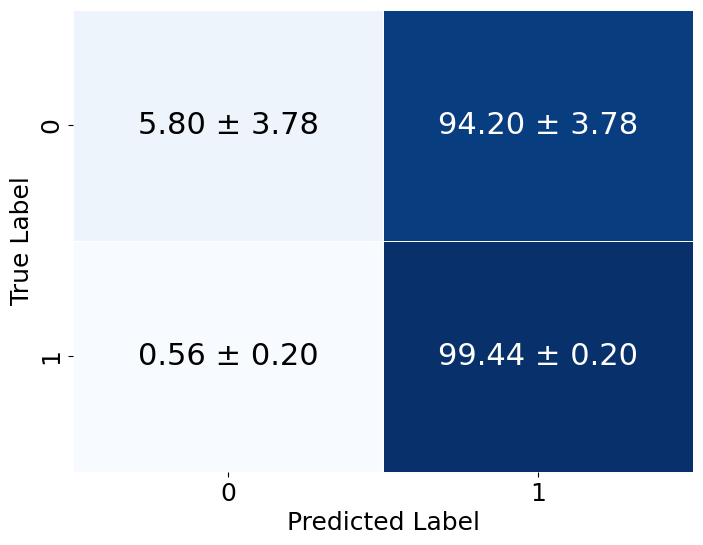

In [5]:
cm_1 = confusion_matrix(df_bf_alexNet_confusion_matrix['Label_1'], df_bf_alexNet_confusion_matrix['Pred_1'])
cm_2 = confusion_matrix(df_bf_alexNet_confusion_matrix['Label_2'], df_bf_alexNet_confusion_matrix['Pred_2'])
cm_3 = confusion_matrix(df_bf_alexNet_confusion_matrix['Label_3'], df_bf_alexNet_confusion_matrix['Pred_3'])


# Criar uma lista com as matrizes de confusão
confusion_matrices = [cm_1, cm_2, cm_3]

# Normalizar as matrizes para que a soma em cada linha seja 100
normalized_matrices = [m.astype('float') / m.sum(axis=1)[:, np.newaxis] * 100 for m in confusion_matrices]

# Calcular a média e desvio padrão das matrizes de confusão normalizadas
average_confusion_percentage = np.mean(normalized_matrices, axis=0)
std_confusion_percentage = np.std(normalized_matrices, axis=0)
labels = [str(i) for i in range(average_confusion_percentage.shape[0])]

# Criar um gráfico de matriz de confusão com média +- desvio padrão
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = sns.heatmap(average_confusion_percentage, annot=False, fmt='.2f', cmap='Blues', cbar=False, ax=ax, linewidths=.5, annot_kws={"size": 10})

for i in range(average_confusion_percentage.shape[0]):
    for j in range(average_confusion_percentage.shape[1]):
        value = average_confusion_percentage[i, j]
        std_value = std_confusion_percentage[i, j]
        text_color = 'white' if average_confusion_percentage[i, j] > 10 else 'black'
        ax.text(j + 0.5, i + 0.5, f'{value:.2f} ± {std_value:.2f}', ha='center', va='center', fontsize=22, color=text_color)

heatmap.set_xticklabels(labels, fontsize=18)
heatmap.set_yticklabels(labels, fontsize=18)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.savefig('Matriz_confusao_AlexNet_BF.pdf', format='pdf', bbox_inches='tight')
plt.show()

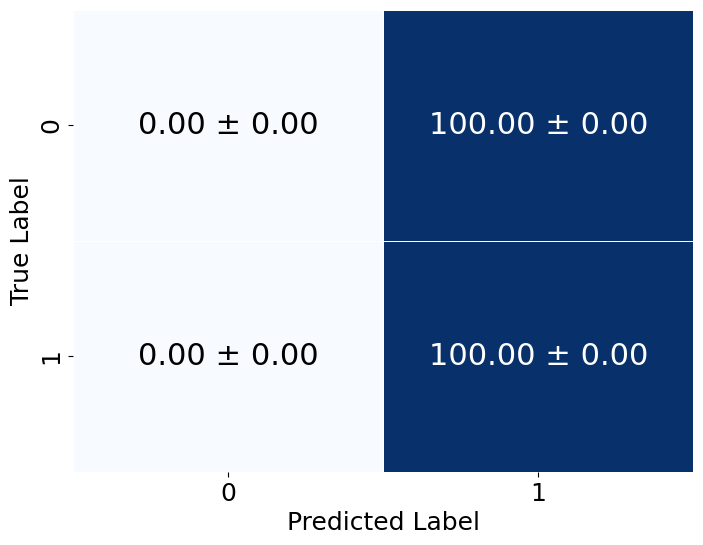

In [6]:
cm_1 = confusion_matrix(df_bf_vgg16_confusion_matrix['Label_1'], df_bf_vgg16_confusion_matrix['Pred_1'])
cm_2 = confusion_matrix(df_bf_vgg16_confusion_matrix['Label_2'], df_bf_vgg16_confusion_matrix['Pred_2'])
cm_3 = confusion_matrix(df_bf_vgg16_confusion_matrix['Label_3'], df_bf_vgg16_confusion_matrix['Pred_3'])


# Criar uma lista com as matrizes de confusão
confusion_matrices = [cm_1, cm_2, cm_3]

# Normalizar as matrizes para que a soma em cada linha seja 100
normalized_matrices = [m.astype('float') / m.sum(axis=1)[:, np.newaxis] * 100 for m in confusion_matrices]

# Calcular a média e desvio padrão das matrizes de confusão normalizadas
average_confusion_percentage = np.mean(normalized_matrices, axis=0)
std_confusion_percentage = np.std(normalized_matrices, axis=0)
labels = [str(i) for i in range(average_confusion_percentage.shape[0])]

# Criar um gráfico de matriz de confusão com média +- desvio padrão
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = sns.heatmap(average_confusion_percentage, annot=False, fmt='.2f', cmap='Blues', cbar=False, ax=ax, linewidths=.5, annot_kws={"size": 10})

for i in range(average_confusion_percentage.shape[0]):
    for j in range(average_confusion_percentage.shape[1]):
        value = average_confusion_percentage[i, j]
        std_value = std_confusion_percentage[i, j]
        text_color = 'white' if average_confusion_percentage[i, j] > 10 else 'black'
        ax.text(j + 0.5, i + 0.5, f'{value:.2f} ± {std_value:.2f}', ha='center', va='center', fontsize=22, color=text_color)

heatmap.set_xticklabels(labels, fontsize=18)
heatmap.set_yticklabels(labels, fontsize=18)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.savefig('Matriz_confusao_VGG16_BF.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Base CIFAR-10

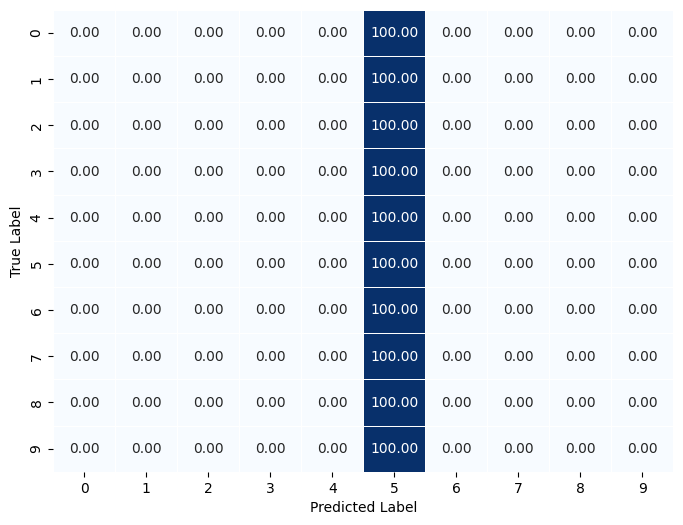

In [7]:
cm_1 = confusion_matrix(df_cifar10_vgg16_confusion_matrix['Label_1'], df_cifar10_vgg16_confusion_matrix['Pred_1'])
cm_2 = confusion_matrix(df_cifar10_vgg16_confusion_matrix['Label_2'], df_cifar10_vgg16_confusion_matrix['Pred_2'])
cm_3 = confusion_matrix(df_cifar10_vgg16_confusion_matrix['Label_3'], df_cifar10_vgg16_confusion_matrix['Pred_3'])


# Criar uma lista com as matrizes de confusão
confusion_matrices = [cm_1, cm_2, cm_3]

# Calcular a média e desvio padrão das matrizes de confusão em porcentagem
average_confusion_percentage = np.mean(confusion_matrices, axis=0) / len(df_cifar10_vgg16_confusion_matrix) * 1000
std_confusion_percentage = np.std(confusion_matrices, axis=0) / len(df_cifar10_vgg16_confusion_matrix) *1000

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(average_confusion_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=ax, linewidths=.5, annot_kws={"size": 10})


plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.title('Matriz de Confusão BF AlexNet Média ± Desvio Padrão (%)')
plt.savefig('Matriz_confusao_VGG16_CIFAR10.pdf', format='pdf', bbox_inches='tight')
plt.show()

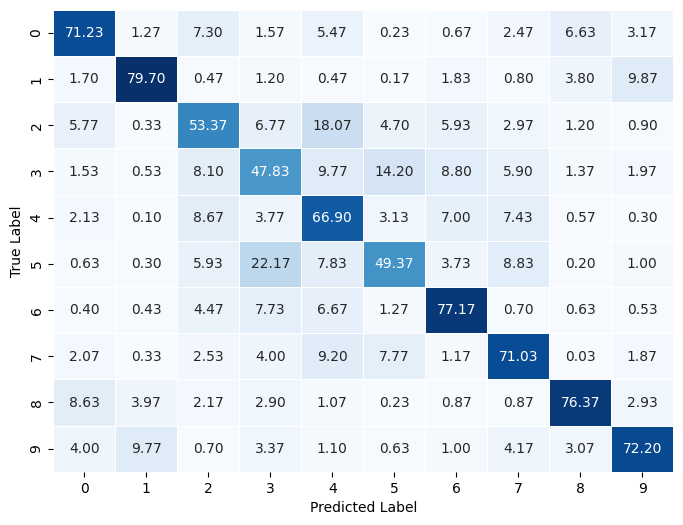

In [8]:
cm_1 = confusion_matrix(df_cifar10_alexNet_confusion_matrix['Label_1'], df_cifar10_alexNet_confusion_matrix['Pred_1'])
cm_2 = confusion_matrix(df_cifar10_alexNet_confusion_matrix['Label_2'], df_cifar10_alexNet_confusion_matrix['Pred_2'])
cm_3 = confusion_matrix(df_cifar10_alexNet_confusion_matrix['Label_3'], df_cifar10_alexNet_confusion_matrix['Pred_3'])


# Criar uma lista com as matrizes de confusão
confusion_matrices = [cm_1, cm_2, cm_3]

# Calcular a média e desvio padrão das matrizes de confusão em porcentagem
average_confusion_percentage = np.mean(confusion_matrices, axis=0) / len(df_cifar10_alexNet_confusion_matrix) *1000
std_confusion_percentage = np.std(confusion_matrices, axis=0) / len(df_cifar10_alexNet_confusion_matrix) * 1000

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(average_confusion_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=ax, linewidths=.5, annot_kws={"size": 10})

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.title('Matriz de Confusão BF AlexNet Média ± Desvio Padrão (%)')
plt.savefig('Matriz_confusao_AlexNet_CIFAR10.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Outros Gráficos

In [37]:
df_bf_alexNet_loss

,Train_loss,Test_loss
0,1.651186,2.449456
1,0.267141,2.695438
2,0.270814,2.580683
3,0.270995,2.519855
4,0.275840,2.487590
...,...,...
145,0.377898,1.537655
146,0.299687,1.592306
147,0.227732,1.629557
148,0.195021,1.612665


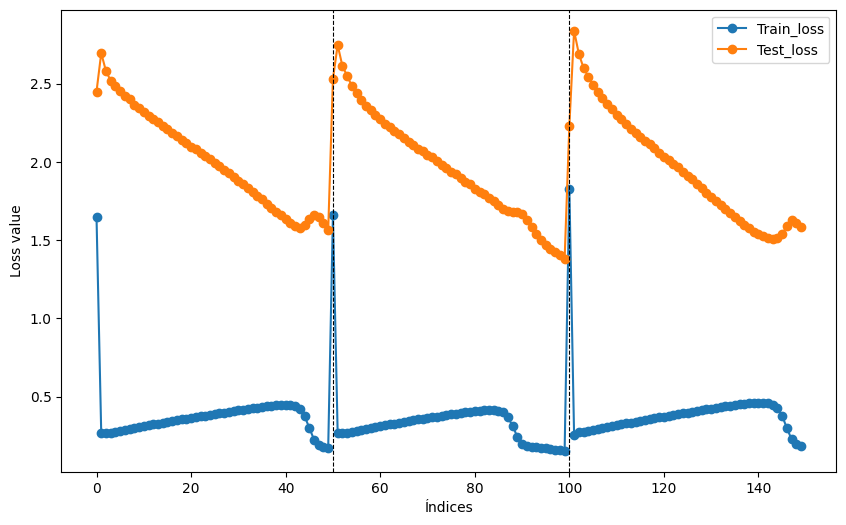

In [9]:


# Criação do gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_bf_alexNet_loss.index, df_bf_alexNet_loss['Train_loss'], label='Train_loss', marker='o')
plt.plot(df_bf_alexNet_loss.index, df_bf_alexNet_loss['Test_loss'], label='Test_loss', marker='o')

# Adiciona rótulos e título
plt.xlabel('Índices')
plt.ylabel('Loss value')
# plt.title('Train_loss e Test_loss ao longo do tempo')
for i in range(50, len(df_bf_vgg16_loss), 50):
    plt.axvline(x=i, color='black', linestyle='--', linewidth=0.8)

# Adiciona a legenda
plt.legend()

# Exibe o gráfico
plt.savefig('Perda_alexNet_BF.pdf', format='pdf', bbox_inches='tight')
plt.show()

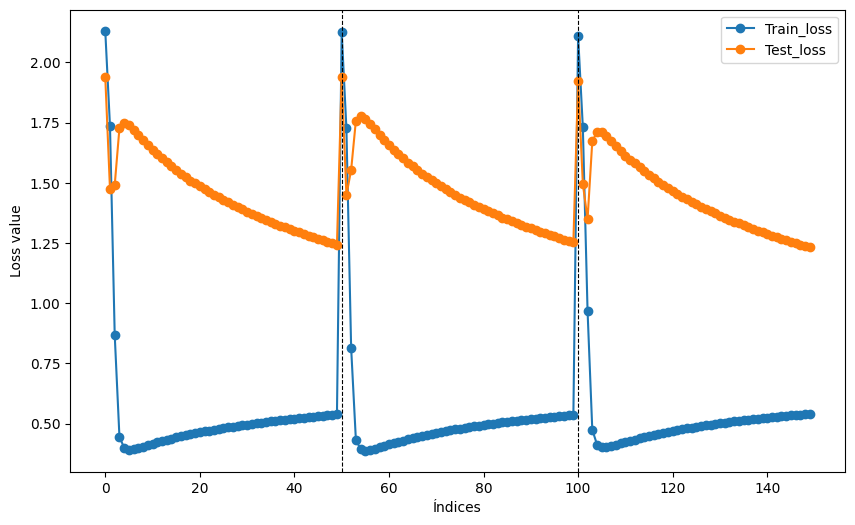

In [10]:
# Criação do gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_bf_vgg16_loss.index, df_bf_vgg16_loss['Train_loss'], label='Train_loss', marker='o')
plt.plot(df_bf_vgg16_loss.index, df_bf_vgg16_loss['Test_loss'], label='Test_loss', marker='o')

# Adiciona rótulos e título
plt.xlabel('Índices')
plt.ylabel('Loss value')
# plt.title('Train_loss e Test_loss ao longo do tempo')
for i in range(50, len(df_bf_vgg16_loss), 50):
      plt.axvline(x=i, color='black', linestyle='--', linewidth=0.8)

# Adiciona a legenda
plt.legend()
plt
# Exibe o gráfico
plt.savefig('Perda_VGG16_BF.pdf.pdf', format='pdf', bbox_inches='tight')
plt.show()

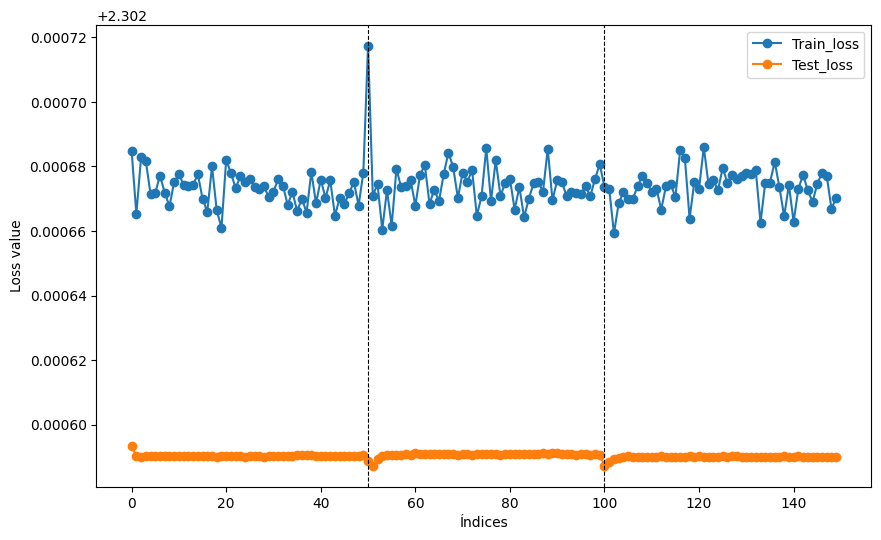

In [14]:
# Criação do gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_cifar10_vgg16_loss.index, df_cifar10_vgg16_loss['Train_loss'], label='Train_loss', marker='o')
plt.plot(df_cifar10_vgg16_loss.index, df_cifar10_vgg16_loss['Test_loss'], label='Test_loss', marker='o')

# Adiciona rótulos e título
plt.xlabel('Índices')
plt.ylabel('Loss value')
# plt.title('Train_loss e Test_loss ao longo do tempo')
for i in range(50, len(df_cifar10_vgg16_loss), 50):
      plt.axvline(x=i, color='black', linestyle='--', linewidth=0.8)

# Adiciona a legenda
plt.legend()
plt
# Exibe o gráfico
plt.savefig('Perda_VGG16_cifar10.pdf', format='pdf', bbox_inches='tight')
plt.show()

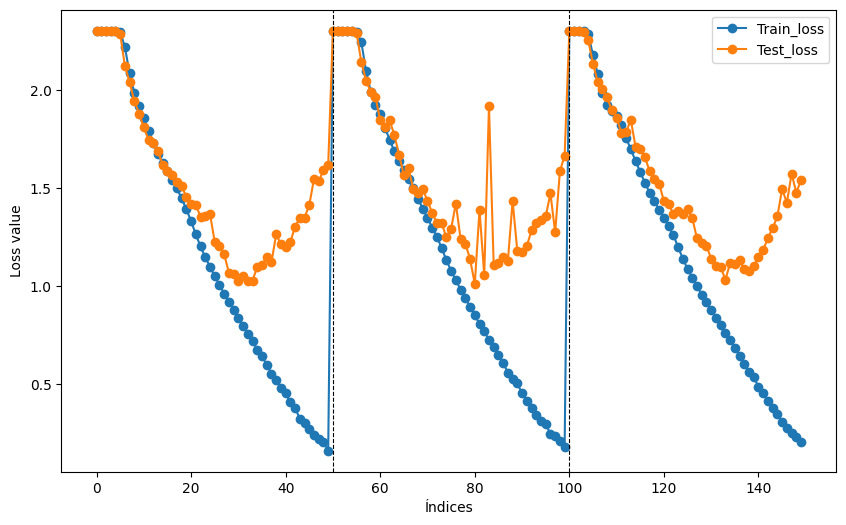

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_cifar10_alexNet_loss.index, df_cifar10_alexNet_loss['Train_loss'], label='Train_loss', marker='o')
plt.plot(df_cifar10_alexNet_loss.index, df_cifar10_alexNet_loss['Test_loss'], label='Test_loss', marker='o')

# Adiciona rótulos e título
plt.xlabel('Índices')
plt.ylabel('Loss value')
# plt.title('Train_loss e Test_loss ao longo do tempo')
for i in range(50, len(df_cifar10_alexNet_loss), 50):
      plt.axvline(x=i, color='black', linestyle='--', linewidth=0.8)

# Adiciona a legenda
plt.legend()
plt
# Exibe o gráfico
plt.savefig('Perda_AlexNet_cifar10.pdf.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Tabelas


### AlexNet BF

In [ ]:
df_BF_alexNet_epochs

,Epochs,Accuracy,Error,F1 Score,Recall Score,Precision
0,5,52.030735,0.692501,0.520307,0.520307,0.520307
1,10,52.030735,0.691036,0.520307,0.520307,0.520307
2,20,52.030735,0.691055,0.520307,0.520307,0.520307
3,50,52.469813,0.685558,0.524698,0.524698,0.524698


In [ ]:
df_BF_alexNet_batchSize

,Batch Size,Accuracy,Error,F1 Score,Recall Score,Precision
0,64,52.030735,1.152476,0.520307,0.520307,0.520307
1,128,52.030735,0.883087,0.520307,0.520307,0.520307
2,256,52.030735,0.775018,0.520307,0.520307,0.520307


In [ ]:
df_BF_alexNet_learnRate

,Learning Rate,Accuracy,Error,F1 Score,Recall Score,Precision
0,0.0100,52.030735,1.422985,0.520307,0.520307,0.520307
1,0.0010,52.030735,1.188879,0.520307,0.520307,0.520307
2,0.0001,52.030735,2.072739,0.520307,0.520307,0.520307


In [ ]:
df_BF_alexNet_bestConfig

,Accuracy,Error,F1 Score,Recall Score,Precision
0,53.677278,1.508432,0.536773,0.536773,0.536773
1,53.347969,1.496610,0.533480,0.533480,0.533480
2,52.030735,1.479878,0.520307,0.520307,0.520307


### AlexNet CIFAR10

In [ ]:
df_cifar10_alexNet_epochs

,5 Epochs,10 Epochs,20 Epochs,50 Epochs
0,1.0,0.0,0.132,0.140
1,0.0,1.0,0.000,0.304
2,0.0,0.0,0.000,0.169
3,0.0,0.0,0.000,0.000
4,0.0,0.0,0.293,0.002
5,0.0,0.0,0.104,0.001
6,0.0,0.0,0.000,0.000
7,0.0,0.0,0.000,0.000
8,0.0,0.0,0.000,0.220
9,0.0,0.0,0.934,0.783


In [ ]:
df_cifar10_alexNet_batchSize

,Batch Size: 64,Batch Size: 128,Batch Size: 256
0,0.796,0.000,0.000
1,0.000,0.000,0.000
2,0.002,0.000,0.000
3,0.000,0.000,0.000
4,0.039,0.009,0.000
5,0.000,0.000,0.002
6,0.000,0.000,0.000
7,0.000,0.000,0.000
8,0.005,0.562,1.000
9,0.529,0.731,0.000


In [ ]:
df_cifar10_alexNet_learnRate

,Learning Rate: 1e-2,Learning Rate: 1e-3,Learning Rate: 1e-4
0,0.706,0.978,0.009
1,0.785,0.000,0.000
2,0.559,0.016,0.000
3,0.622,0.000,0.000
4,0.549,0.000,0.000
5,0.577,0.000,0.000
6,0.767,0.400,0.999
7,0.684,0.000,0.000
8,0.840,0.002,0.000
9,0.732,0.000,0.000


In [ ]:
df_cifar10_alexNet_bestConfig

,Iter 1,Iter 2,Iter 3
0,0.719,0.703,0.715
1,0.810,0.787,0.794
2,0.304,0.710,0.587
3,0.389,0.544,0.502
4,0.765,0.587,0.655
5,0.496,0.440,0.545
6,0.775,0.777,0.763
7,0.796,0.620,0.715
8,0.659,0.827,0.805
9,0.739,0.680,0.747


### VGG16 BF


In [ ]:
df_BF_vgg16_epochs

,Epochs,Accuracy,Error,F1 Score,Recall Score,Precision
0,5,52.030735,0.692524,0.520307,0.520307,0.520307
1,10,52.030735,0.692262,0.520307,0.520307,0.520307
2,20,52.030735,0.691415,0.520307,0.520307,0.520307
3,50,52.030735,0.690752,0.520307,0.520307,0.520307


In [ ]:
df_BF_vgg16_batchSize

,Batch Size,Accuracy,Error,F1 Score,Recall Score,Precision
0,64,52.030735,0.790139,0.520307,0.520307,0.520307
1,128,52.030735,1.074370,0.520307,0.520307,0.520307
2,256,52.030735,1.811420,0.520307,0.520307,0.520307


In [ ]:
df_BF_vgg16_learnRate

,Learning Rate,Accuracy,Error,F1 Score,Recall Score,Precision
0,0.0100,52.030735,1.235880,0.520307,0.520307,0.520307
1,0.0010,52.030735,0.787854,0.520307,0.520307,0.520307
2,0.0001,52.030735,2.105333,0.520307,0.520307,0.520307


In [ ]:
df_BF_vgg16_bestConfig

,Accuracy,Error,F1 Score,Recall Score,Precision
0,52.030735,1.242496,0.520307,0.520307,0.520307
1,52.030735,1.244608,0.520307,0.520307,0.520307
2,52.030735,1.254629,0.520307,0.520307,0.520307


### VGG16 CIFAR 10

In [ ]:
df_cifar10_vgg16_epochs

,5 Epochs,10 Epochs,20 Epochs,50 Epochs
0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [ ]:
df_cifar10_vgg16_batchSize

,Batch Size: 64,Batch Size: 128,Batch Size: 256
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [ ]:
df_cifar10_vgg16_learnRate

,Learning Rate: 1e-2,Learning Rate: 1e-3,Learning Rate: 1e-4
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [ ]:
df_cifar10_vgg16_bestConfig

,Iter 1,Iter 2,Iter 3
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,1.0,1.0,1.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0
